# Multi-modal RAG with LangChain

In [1]:
# for linux
!apt-get install poppler-utils tesseract-ocr libmagic-dev

# for mac
# !brew install poppler tesseract libmagic
# %pip install poppler tesseract libmagic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,086 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 291 kB in 10s (27.9 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler

In [2]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os

# keys for the services we will use

os.environ["OPENAI_API_KEY"] = ""
os.environ["GROQ_API_KEY"] = ""
os.environ["LANGCHAIN_API_KEY"] = "lsv2"
os.environ["LANGCHAIN_TRACING_V2"] = "true"


## Extract the data

Extract the elements of the PDF that we will be able to use in the retrieval process. These elements can be: Text, Images, Tables, etc.

### Partition PDF tables, text, and images

In [5]:
import requests
from pathlib import Path
from unstructured.partition.pdf import partition_pdf

# Create content directory if it doesn't exist
output_path = Path("./content/")
output_path.mkdir(parents=True, exist_ok=True)

# Download the PDF
url = "https://www.uvm.edu/~ldonfort/P21S20/2_Kinematics.pdf"
file_path = output_path / "2_Kinematics.pdf"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

# Now use partition_pdf
chunks = partition_pdf(
    filename=str(file_path),
    infer_table_structure=True,
    strategy="hi_res",
    extract_image_block_types=["Image"],
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)

# Example: print the text from each chunk
for chunk in chunks:
    print(chunk.text[:300])  # Print first 300 characters of each chunk


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

PHYSICS

Kinematics

Investigation Manual

GARQLINA DISTANCE LEARNING

KINEMATICS

Table of Contents

Overview Outcomes Time Requirements Background Materials Safety Preparation Technology Activity 1 9 Activity 2 11 Activity 3 15 Activity 4 16 Activity 5 17 Disposal and Cleanup 18 Observations ©} C|
Background

Mechanics is the branch of physics that studies the motion of objects and the forces and energies that affect those motions. Clas- sical mechanics refers to the motion of objects that are large (compared to subatomic particles) and slow (compared to the speed of light). The effects of qu
Key

Personal protective equipment A. (PPE) <p oe |

= (O) |

© | follow photograph link to results and — goggies gloves apron | video submit bo oS ©

2 ©)

stopwatch required

warning corrosion flammable toxic environment health hazard

continued on next page

CAROLINA

www.carolina.com/distancelea
Figure 1.

ee ees 6-5-4 -3 -2-1 012 34 5 6

Figure 2.

Figure 2.

Figure 3.

Figure 3.

The arrow

In [6]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [7]:
# Each CompositeElement containes a bunch of related elements.
# This makes it easy to use these elements together in a RAG pipeline.

chunks[3].metadata.orig_elements

In [8]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '68a25ff9-1349-4896-8cab-9f0645d0ef4d',
 'text': 'Figure 2.',
 'metadata': {'detection_class_prob': 0.5667855739593506,
  'coordinates': {'points': ((np.float64(116.06170654296875),
     np.float64(806.50732421875)),
    (np.float64(116.06170654296875), np.float64(1166.0367431640625)),
    (np.float64(374.8994445800781), np.float64(1166.0367431640625)),
    (np.float64(374.8994445800781), np.float64(806.50732421875))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-05-06T04:21:53',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 5,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFnAQMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaE

### Separate extracted elements into tables, text, and images

In [9]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [10]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

#### Check what the images look like

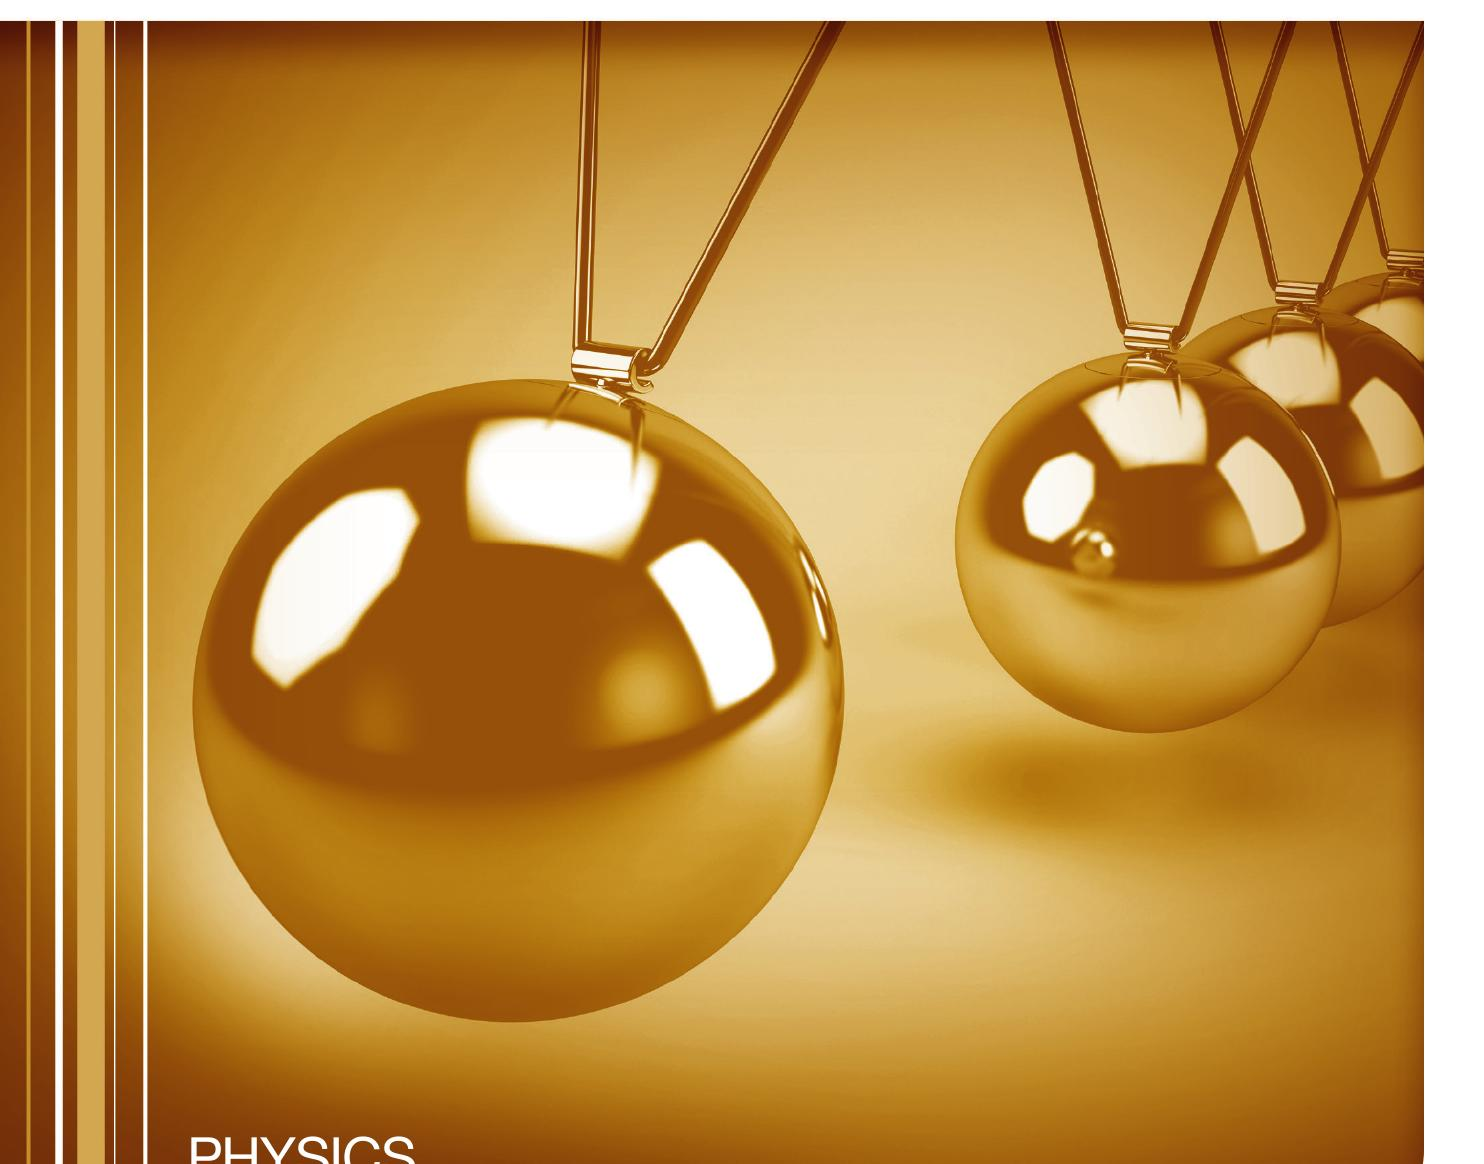

In [11]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.

In [12]:
%pip install -Uq langchain-groq

In [13]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [14]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [26]:
import time
import re
from more_itertools import chunked

def safe_batch_summarize(inputs, max_concurrency=3, max_retries=5, default_delay=10):
    summaries = []
    chunks = list(chunked(inputs, max_concurrency))

    for chunk in chunks:
        retry_count = 0
        while retry_count <= max_retries:
            try:
                result = summarize_chain.batch(chunk, {"max_concurrency": max_concurrency})
                summaries.extend(result)
                break
            except Exception as e:
                message = str(e).lower()
                if "rate limit" in message or "429" in message:
                    retry_count += 1
                    delay_match = re.search(r"try again in ([\d\.]+)s", message)
                    delay = float(delay_match.group(1)) if delay_match else default_delay
                    print(f"Rate limit hit. Retrying in {delay:.2f}s... (Attempt {retry_count}/{max_retries})")
                    time.sleep(delay)
                else:
                    raise e
        else:
            print("Max retries exceeded. Skipping this chunk.")
    return summaries


In [27]:
text_summaries = safe_batch_summarize(texts)
print("Text Summaries:")
for i, summary in enumerate(text_summaries, 1):
    print(f"\n--- Summary {i} ---")
    print(summary)

Rate limit hit. Retrying in 7.43s... (Attempt 1/5)
Text Summaries:

--- Summary 1 ---
Kinematics is the branch of physics that deals with the analysis of motion without concern for the forces causing it. The investigation focuses on objects moving with constant velocity or acceleration, using equations to predict future position and velocity.

--- Summary 2 ---
Classical mechanics is the branch of physics that studies the motion of large, slow-moving objects, describing their motion using principles of physics and kinematics. Kinematics is a specific branch of mechanics that focuses on describing motion without referencing forces, using equations to predict an object's position, velocity, and acceleration over time. Early scientists such as Galileo, Newton, and Kepler developed mathematical laws to describe and predict the motion of objects, laying the foundation for classical mechanics.

--- Summary 3 ---
Personal protective equipment includes gloves, apron, and goggles. Warning signs

### Image summaries

We will use gpt-4o-mini to produce the image summaries.

In [28]:
%pip install -Uq langchain_openai

In [ ]:
image_summaries

['The image presents a schematic representation of the transformer architecture, which is fundamental in natural language processing and machine learning. Here’s a detailed description of its components:\n\n1. **Overall Structure**: The diagram is divided into two main sections, representing the encoder (on the left) and the decoder (on the right) of the transformer model. Both sections involve repeated layers denoted as \\(N_x\\), indicating that these layers are stacked multiple times.\n\n2. **Positional Encoding**: At the bottom of both sections, there are blocks labeled "Positional Encoding." This component is crucial as it adds information about the position of tokens in the sequence, enabling the model to understand the order of inputs.\n\n3. **Input and Output Embeddings**: Below the positional encoding blocks, there are two labeled boxes: “Input Embedding” for the encoder and “Output Embedding” for the decoder. These embeddings transform the input tokens into continuous vector 

In [ ]:
print(image_summaries[1])

The image depicts two main concepts from the transformer architecture: **Scaled Dot-Product Attention** and **Multi-Head Attention**.

### Scaled Dot-Product Attention (Left Side)
1. **Structure**: 
   - The flow starts with three inputs represented as **Q** (Query), **K** (Key), and **V** (Value).
   - The first operation is a **MatMul** (matrix multiplication) between Q and K, producing a score.
   - This score is then passed to a **Scale** component, which adjusts the magnitude of the scores.
   - An optional **Mask** is applied next to prevent certain positions from being attended to, often used in tasks like language modeling.
   - The scores are then passed through a **SoftMax** layer to convert them into probabilities.
   - Finally, another **MatMul** operation takes the output from SoftMax and multiplies it by V to produce the final attention output.

### Multi-Head Attention (Right Side)
1. **Structure**:
   - This section builds upon the scaled dot-product attention.
   - It 

### Create the vectorstore

In [ ]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

/var/folders/lh/7g2mv_x16p79z2rd9jqxqx_w0000gn/T/ipykernel_92745/278287695.py:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
/var/folders/lh/7g2mv_x16p79z2rd9jqxqx_w0000gn/T/ipykernel_92745/278287695.py:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi

### Load the summaries and link the to the original data

In [ ]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

### Check retrieval

In [ ]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [ ]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

## RAG pipeline

In [ ]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [ ]:
response = chain.invoke(
    "What is the attention mechanism?"
)

print(response)

In [ ]:
response = chain_with_sources.invoke(
    "What is multihead?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)